# Cats VS Dogs - Image Classification

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from keras.models import Sequential ,Model 
from keras.layers import Activation,Dense,Conv2D,MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os 
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
train_path = '/content/drive/MyDrive/Data Science Projects/cats vs dogs/train'
valid_path = '/content/drive/MyDrive/Data Science Projects/cats vs dogs/valid'
test_path = '/content/drive/MyDrive/Data Science Projects/cats vs dogs/test'

# preprocessing the iamges

In [3]:

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes ==2

In [5]:
imags , labels = next(train_batches)

In [6]:
def plotImages(images_arr):
  fig , axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()

  for img , ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


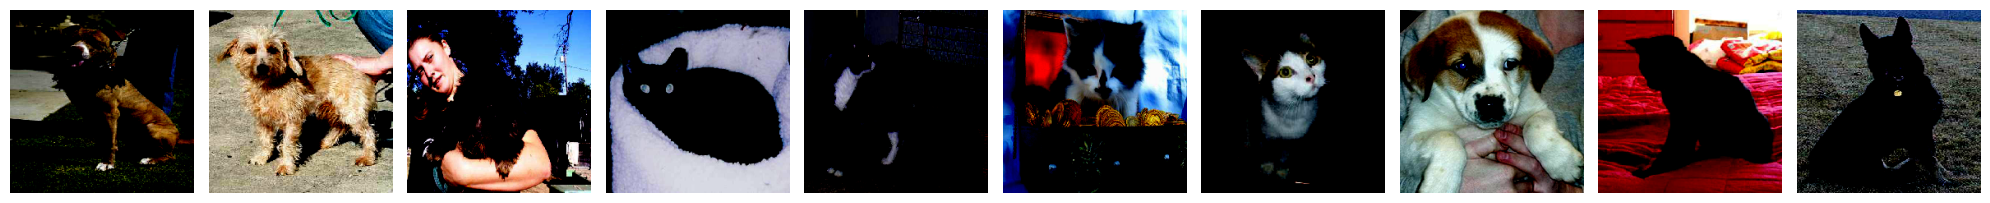

In [7]:
plotImages(imags)

In [8]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


Build our model

In [9]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(units=2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=20,verbose=2)

Epoch 1/20
100/100 - 182s - loss: 0.5950 - accuracy: 0.6880 - val_loss: 0.5906 - val_accuracy: 0.6550 - 182s/epoch - 2s/step
Epoch 2/20
100/100 - 6s - loss: 0.5246 - accuracy: 0.7350 - val_loss: 0.5857 - val_accuracy: 0.6850 - 6s/epoch - 57ms/step
Epoch 3/20
100/100 - 6s - loss: 0.4270 - accuracy: 0.8190 - val_loss: 0.6303 - val_accuracy: 0.6200 - 6s/epoch - 63ms/step
Epoch 4/20
100/100 - 6s - loss: 0.3387 - accuracy: 0.8900 - val_loss: 0.5819 - val_accuracy: 0.7000 - 6s/epoch - 64ms/step
Epoch 5/20
100/100 - 7s - loss: 0.2743 - accuracy: 0.9100 - val_loss: 0.6337 - val_accuracy: 0.6650 - 7s/epoch - 68ms/step
Epoch 6/20
100/100 - 6s - loss: 0.2258 - accuracy: 0.9360 - val_loss: 0.6712 - val_accuracy: 0.6700 - 6s/epoch - 57ms/step
Epoch 7/20
100/100 - 7s - loss: 0.1699 - accuracy: 0.9690 - val_loss: 0.6631 - val_accuracy: 0.6500 - 7s/epoch - 69ms/step
Epoch 8/20
100/100 - 6s - loss: 0.1387 - accuracy: 0.9820 - val_loss: 0.6647 - val_accuracy: 0.6800 - 6s/epoch - 60ms/step
Epoch 9/20
100

In [33]:
mobile_new = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

17225924/17225924 [==============================] - 1s 0us/step


In [34]:
mobile_new.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [57]:
x = Flatten()(mobile_new.layers[-6].output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = Dense(units=2,activation='softmax')(x)

In [58]:
Models = Model(inputs=mobile_new.input,outputs=output)

In [59]:
# we use only last 23 layers
for layer in Models.layers[:-23]:
  layer.trainable=False

In [60]:
Models.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [61]:
Models.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
Models.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)

Epoch 1/15
100/100 - 9s - loss: 0.7003 - accuracy: 0.8510 - val_loss: 0.1032 - val_accuracy: 0.9550 - 9s/epoch - 87ms/step
Epoch 2/15
100/100 - 6s - loss: 0.0613 - accuracy: 0.9840 - val_loss: 0.0844 - val_accuracy: 0.9650 - 6s/epoch - 57ms/step
Epoch 3/15
100/100 - 6s - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9650 - 6s/epoch - 58ms/step
Epoch 4/15
100/100 - 6s - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9700 - 6s/epoch - 60ms/step
Epoch 5/15
100/100 - 6s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9700 - 6s/epoch - 60ms/step
Epoch 6/15
100/100 - 6s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9700 - 6s/epoch - 64ms/step
Epoch 7/15
100/100 - 7s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 0.9700 - 7s/epoch - 67ms/step
Epoch 8/15
100/100 - 6s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9700 - 6s/epoch - 60ms/step
Epoch 9/15
100/1

In [65]:
pred_new = Models.predict(x=test_batches,verbose=2)
pred_new[2]

10/10 - 1s - 807ms/epoch - 81ms/step


array([9.999275e-01, 7.244739e-05], dtype=float32)

In [70]:
pope_path = '/content/drive/MyDrive/Data Science Projects/dog'
pope = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=pope_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

pre_testing = Models.predict(x=pope)
pre_testing


Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 287ms/step


array([[4.3660327e-07, 9.9999952e-01]], dtype=float32)

In [71]:
model.save('/content/drive/MyDrive/Data Science Projects/dog/Models/cats_dogs_classifiers.h5')

In [73]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Data Science Projects/dog/Models/cats_dogs_classifiers.h5')

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4